# Modelling COVID-19 based on COVID-19 data and Google Community Mobility data.

# <h1>Table of Contents</h1>
<ol type='1'>
<li><h2><a href="#preparation">Data Preparation</a></h2></li>
<li><h2><a href="#impact">Impact Analysis</a></h2></li>
<ol type='a'>
<li><h3><a href="#impact">Approach and Techniques</a></h3></li>
<li><h3><a href="#impact_results">Observations</a></h3></li>
</ol>
<li><h2><a href="#trend">Trend Analysis</a></h2></li>
<ol type='a'>
<li><h3><a href="#trend">Approach and Techniques</a></h3></li>
<li><h3><a href="#trend_results">Observations</a></h3></li>
</ol>
<li><h2><a href="#correlation">Correlation Analysis</a></h2></li>
<ol type='a'>
<li><h3><a href="#correlation">Approach and Techniques</a></h3></li>
<li><h3><a href="#correlation_results">Observations</a></h3></li>
</ol>
<li><h2><a href="#summary">Summary</a></h2></li>
<li><h2><a href="#references">References</a></h2></li>
</ol>

## Imports

In [1]:
# uncomment to install
# %pip install missingno
# %pip install plotly
# %pip install jupyter-dash

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

<h1><a name="preparation">Data Preparation: Description of Methods</a></h1>

Description of process

As a first step, we went through various data preprocesing or preparation steps to ensure that our dataset is fit for analysis.
The steps include :
- handling missing values :
    -   dropping columns with more than 80% nulls
    -   Replacing NaNs with 0 on covid features (cases,deaths,tests,etc), this was done to not exaggerate or minimize unconfirmed situations
    -   interpolation on government strategy, the reasoning was that before covid-19 the government already has health measures in place
- dropping redudant features :
    -   columns such as total_cases, total_death, total deaths per million, new cases smoothed, etc. already contained information present in new cases and new deaths columns
- dropping features with unique or unchanging values:
    -   columns such as population, hdi, median age, etc. these columns were not inline with the project's objective and were therefore dropped
- scalling dataset features :
    -   The entire dataset was scaled to generalize the data points and reduce the distance between them, this was done to make the visualizations more intuative

In [3]:
#Actual data preparation

# load original dataset
df = pd.read_csv("rw-mobility-covid-data.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.sample(10)

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,total_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-07-18,-12.0,-10.0,1.0,-14.0,-4.0,8.0,1539.0,54.0,34.286,5.0,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
2021-06-02,32.0,14.0,29.0,7.0,0.0,7.0,27064.0,41.0,35.286,358.0,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
2021-06-01,32.0,13.0,30.0,3.0,0.0,9.0,27023.0,60.0,34.714,357.0,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
2021-12-13,48.0,16.0,44.0,10.0,16.0,10.0,100634.0,0.0,29.286,1344.0,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
2021-01-07,0.0,-21.0,14.0,-25.0,-15.0,22.0,9225.0,167.0,120.286,113.0,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
2020-08-15,-13.0,-6.0,10.0,-5.0,-9.0,6.0,2352.0,59.0,31.143,8.0,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
2021-04-28,13.0,-1.0,5.0,-3.0,-9.0,9.0,24888.0,74.0,110.857,332.0,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
2020-06-18,-27.0,-20.0,-7.0,-23.0,-22.0,12.0,646.0,7.0,21.714,2.0,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
2021-05-28,26.0,8.0,27.0,4.0,-1.0,9.0,26878.0,35.0,39.571,352.0,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543


In [4]:
# display % of missing values in each column
null_percentage = df.isnull().sum()/df.shape[0]*100
missing_value_df = pd.DataFrame({'percent_missing': null_percentage})
display(missing_value_df)

,percent_missing
retail_and_recreation_percent_change_from_baseline,0.000000
grocery_and_pharmacy_percent_change_from_baseline,0.000000
parks_percent_change_from_baseline,0.000000
transit_stations_percent_change_from_baseline,0.000000
workplaces_percent_change_from_baseline,0.000000
residential_percent_change_from_baseline,0.000000
total_cases,3.743316
new_cases,3.743316
new_cases_smoothed,4.545455
total_deaths,14.037433


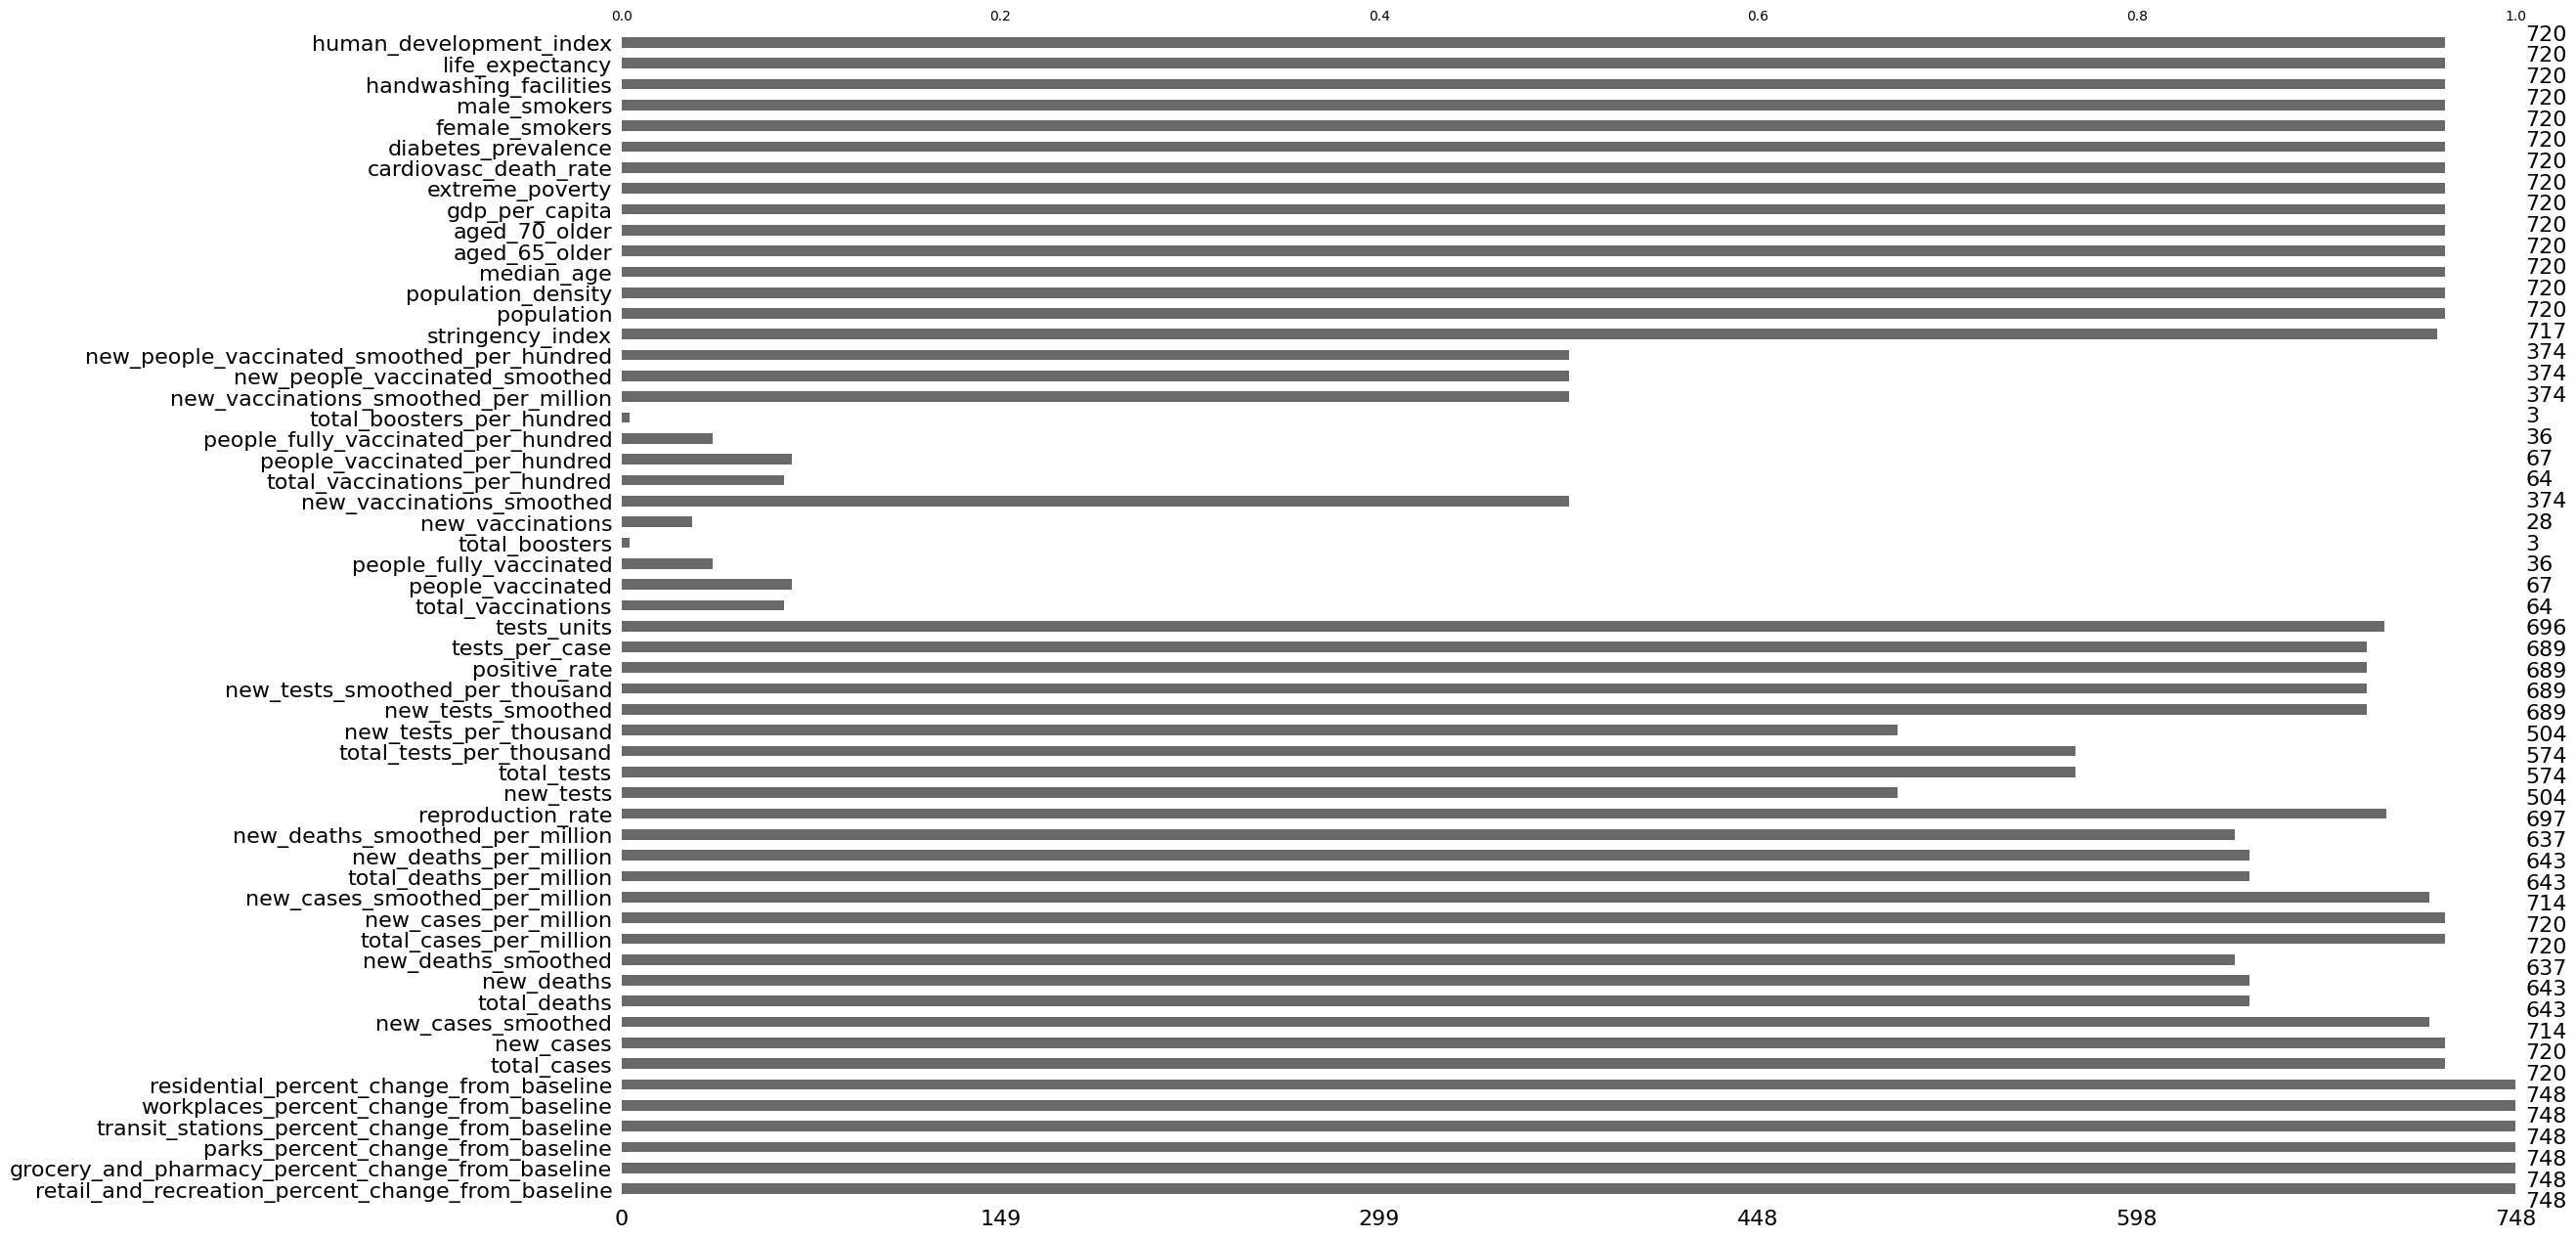

In [5]:
# visualize missing values
msno.bar(df)
plt.show()

In [6]:
df.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,total_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,720.00000,720.000000,714.000000,643.000000,...,7.200000e+02,7.200000e+02,720.0,720.000,720.00,7.200000e+02,720.0,7.200000e+02,720.00,7.200000e+02
mean,2.366310,-10.311497,13.312834,-16.455882,-14.012032,14.926471,40023.73750,179.920833,181.376744,548.636081,...,1.642000e+00,1.854211e+03,56.0,191.375,4.28,4.700000e+00,21.0,4.617000e+00,69.02,5.430000e-01
std,31.076527,20.843730,24.857904,24.408053,20.079657,8.498756,44516.22289,314.119722,285.450621,552.305359,...,2.221990e-16,2.275317e-13,0.0,0.000,0.00,8.887959e-16,0.0,8.887959e-16,0.00,1.110995e-16
min,-71.000000,-76.000000,-32.000000,-80.000000,-76.000000,-3.000000,1.00000,0.000000,1.143000,1.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.28,4.700000e+00,21.0,4.617000e+00,69.02,5.430000e-01
25%,-15.000000,-20.000000,-4.000000,-29.000000,-24.000000,10.000000,4474.25000,15.000000,17.714000,36.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.28,4.700000e+00,21.0,4.617000e+00,69.02,5.430000e-01
50%,2.000000,-9.000000,7.000000,-13.000000,-13.000000,13.000000,19719.00000,55.000000,60.642500,322.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.28,4.700000e+00,21.0,4.617000e+00,69.02,5.430000e-01
75%,28.000000,5.250000,30.250000,3.000000,1.000000,17.000000,89585.00000,166.250000,160.642750,1237.500000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.28,4.700000e+00,21.0,4.617000e+00,69.02,5.430000e-01
max,68.000000,33.000000,167.000000,28.000000,30.000000,47.000000,129543.00000,3072.000000,1396.571000,1458.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.28,4.700000e+00,21.0,4.617000e+00,69.02,5.430000e-01


### Handling missing values

In [7]:
# drop features having more than 80% missing
col_to_drop = null_percentage[null_percentage>80].keys()
output_df = df.drop(col_to_drop, axis=1)
# interpolate stringency index
output_df['stringency_index'].interpolate(inplace=True)
# fill rest of missing with 0
output_df.fillna(0,inplace=True)

In [8]:
output_df.isna().sum()

retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
total_cases                                           0
new_cases                                             0
new_cases_smoothed                                    0
total_deaths                                          0
new_deaths                                            0
new_deaths_smoothed                                   0
total_cases_per_million                               0
new_cases_per_million                                 0
new_cases_smoothed_per_million                        0
total_deaths_per_million                              0
new_deaths_per_million                                0
new_deaths_smoothed_per_million                 

### Feature selection

In [9]:
# drop columns with repeating values (1-2 unique values)
drop_col = []
for i in output_df.columns:
    if (len(output_df[i].unique()) <= 2):
        drop_col.append(i)

output_df.drop(columns=drop_col,axis=1,inplace=True)

In [10]:
# remove redundant features
per_million = output_df.filter(like='per_million').columns
per_thousand = output_df.filter(like='per_thousand').columns
total = output_df.filter(like='total').columns
smoothed = output_df.filter(like='smoothed').columns
output_df.drop(columns=smoothed.append(total).append(per_million).append(per_thousand), axis=1, inplace=True)

### Create updated cleaned dataset

In [11]:
# write to new dataset
output_df.to_csv('bmuvunyi_project.csv')

clean_df = pd.read_csv('bmuvunyi_project.csv',index_col=0)
clean_df.head(5)

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,new_cases,new_deaths,reproduction_rate,new_tests,positive_rate,tests_per_case,stringency_index
date,,,,,,,,,,,,,
2020-02-15,8.0,5.0,7.0,12.0,5.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-16,1.0,-1.0,-2.0,5.0,6.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-17,1.0,0.0,8.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-18,0.0,-2.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-19,-4.0,-8.0,7.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
final_covid_df = pd.DataFrame(scale.fit_transform(clean_df.values), columns=clean_df.columns, index=clean_df.index)
final_covid_df.sample(5)

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,new_cases,new_deaths,reproduction_rate,new_tests,positive_rate,tests_per_case,stringency_index
date,,,,,,,,,,,,,
2021-10-10,0.986410,1.071134,0.873029,0.879637,0.897629,-0.697800,-0.242646,0.613877,-0.586441,-0.789529,-0.418957,-0.225747,-0.575477
2022-02-07,1.276211,1.167150,1.597630,1.002630,1.545484,0.126401,-0.507283,-0.284128,-1.404832,1.432216,-0.713430,0.635364,-0.628523
2021-03-13,-0.301597,-0.129070,-1.180005,-0.801260,0.050435,-0.226828,-0.281373,-0.284128,-0.040847,-0.789529,0.054762,-0.452959,0.545978
2022-01-17,1.179611,0.975118,1.315841,1.166620,1.296309,0.126401,0.738448,0.314542,-0.607425,2.150672,0.379109,-0.508959,-0.788813
2020-03-19,-0.816799,-0.177078,-0.576171,0.141683,-0.497750,-0.580057,-0.558920,-0.583464,-2.013379,-0.789529,-0.862801,-0.666400,-1.189539


In [13]:
# rename location columns
name_mapping={'date':'date','retail_and_recreation_percent_change_from_baseline':'rr',\
              'grocery_and_pharmacy_percent_change_from_baseline' :'gp',\
              'parks_percent_change_from_baseline' :'pks',\
              'transit_stations_percent_change_from_baseline':'transit',\
              'workplaces_percent_change_from_baseline':'wp',
              'residential_percent_change_from_baseline':'res'}

final_covid_df.rename(name_mapping, axis=1, inplace=True)

In [14]:
final_covid_df.columns

Index(['rr', 'gp', 'pks', 'transit', 'wp', 'res', 'new_cases', 'new_deaths',
       'reproduction_rate', 'new_tests', 'positive_rate', 'tests_per_case',
       'stringency_index'],
      dtype='object')

<h1><a name="impact">Impact Analysis: Approach and Techniques</a></h1>

#### To visualize the impact of covid-19, and government intervention on mobily we utized 3 interactive timeseries graphs using plotly. each containing mobility data and the influencing feature (cases, deaths, governemt strategy)


In [15]:
import plotly.graph_objects as go

trace1 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.rr,
    name='Retail and recreation'
)
trace2 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.gp,
    name='Grocery and pharmacy'
)
trace3 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.pks,
    name='Parks'
)
trace4 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.transit,
    name='Transit station'
)
trace5 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.wp,
    name='Workplace'
)
trace6 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.res,
    name='Residential'
)
trace7 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.stringency_index,\
    name='Government action(stringency_index)',
    line = dict(color='firebrick', dash='dot')
)

data = [trace1, trace2,trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    legend=dict(traceorder="reversed"),
    title='Mobility patterns based on Government action',
    xaxis_title='Date',
    yaxis_title='Values')
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [16]:
import plotly.graph_objects as go

trace1 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.rr,
    name='Retail and recreation'
)
trace2 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.gp,
    name='Grocery and pharmacy'
)
trace3 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.pks,
    name='Parks'
)
trace4 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.transit,
    name='Transit station'
)
trace5 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.wp,
    name='Workplace'
)
trace6 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.res,
    name='Residential'
)
trace7 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.new_deaths,\
    name='Deaths',
    line = dict(color='firebrick', dash='dot')
)

data = [trace1, trace2,trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    legend=dict(
        traceorder="reversed"
    ),
    title='Mobility patterns based on New deaths',xaxis_title='Date',
                   yaxis_title='Values'
)
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [17]:
import plotly.graph_objects as go

trace1 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.rr,
    name='Retail and recreation',
)
trace2 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.gp,
    name='Grocery and pharmacy'
)
trace3 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.pks,
    name='Parks'
)
trace4 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.transit,
    name='Transit station'
)
trace5 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.wp,
    name='Workplace'
)
trace6 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.res,
    name='Residential'
)
trace7 = go.Scatter(
    x=final_covid_df.index,
    y=final_covid_df.new_cases,\
    name='Cases',
    line = dict(color='firebrick', dash='dot')
)

data = [trace1, trace2,trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    legend=dict(
        traceorder="reversed"
    ),
    title='Mobility patterns based on New cases',
    xaxis_title='Date',
    yaxis_title='Values'
)
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

<h1><a name="impact_results">Observations on Impact Analysis </a></h1>

#### Government action on mobility
The first case of Covid-19 in Rwanda was discovered on March 14th, 2020[1]. Government action peaked shortly thereafter at the same time as mobility activity in residential areas, and the opposite was true for some other locations. This can be interpreted as the lock-down mandate, which required everyone to stay inside their homes and thus reduced movement throughout the rest of the country. Other restrictions include curfews, reduced work and public transport capacity, etc. As government restrictions began to ease in May 2021, which coincided with the lifting of the lock-down, mobility between different locations began to normalize again. In late 2021 and early 2022, the Covid-19 curfew was officially lifted[2], causing an increase in park-based mobility and a decrease in residential areas.

#### Covid-19 cases on mobility
From the time series plot we can analyze that in instances where Covid-19 cases spiked particularly around January 2021 and July 2021, mobility in residential areas increased which was prompted by most people staying in doors and avoiding movement in other locations. The highest occurrences of new Covid-19 cases was observed in July, 2021. However, an exception of this analysis is observed at the start of 2022, this could be due to the fact that vaccines had become more prevalent.

#### Covid-19 deaths on mobility
Similar to cases, instance where deaths increased, saw mobility in all locations apart from residential decline. The highest number of deaths were observed mid 2021, beginning from July to when the toll declined in October.

<h1><a name="trend">Trend Analysis: Approach and Techniques</a></h1>

We plan to observe and analyze the general effect and impact of both cases and deaths of Covid-19 on mobility, within a period of 3, 6 and 12 months.
The Dash package was used to be able to compare each individual mobility trend with how it was burdened by Covid-19.

In [20]:
# %pip install jupyter_dash

In [25]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H4('Disease burden (Cases & Deaths) on Mobility over 3, 6, and 12 months'),
    dcc.Graph(id="time-series-chart"),
    html.P("Select option:"),
    dcc.Dropdown(
        id="location",
        options=[
            {'label': 'Retail and Recreation', 'value': 'rr'},
            {'label': 'Grocery and Pharmacy', 'value': 'gp'},
            {'label': 'Parks', 'value': 'pks'},
            {'label': 'Transit station', 'value': 'transit'},
            {'label': 'Workplace', 'value': 'wp'},
            {'label': 'Residential', 'value': 'res'},
            {'label': 'Cases', 'value': 'new_cases'},
            {'label': 'Deaths', 'value': 'new_deaths'}
        ],
        value=['rr', 'new_cases'],
        clearable=False,
        multi=True
    ),
])


@app.callback(
    Output("time-series-chart", "figure"),
    Input("location", "value"))
def display_time_series(option):
    df = final_covid_df
    fig = px.line(df, x=df.index, y=option)

    fig.update_xaxes(rangeslider_visible=True,
        rangeselector=dict(
        buttons=list([
            dict(count=3, label="3 months", step="month", stepmode="backward"),
            dict(count=6, label="6 months", step="month", stepmode="backward"),
            dict(count=1, label="12 months", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ))
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

<h1><a name="trend_results">Observations on Trend Analysis</a></h1>

#### Disease burden on Residential
According to mobility in residential areas, a general tendency can be noted as the disease (Covid-19) expanded and spread, with residential regions experiencing the greatest rise in activity. This was owing to the widespread use of lockdowns, remote work, curfews, and quarantines, all of which were implemented to prevent the disease from spreading quickly.
#### Disease burden on Grocery and Pharmacy
A general trend that can be observed in these locations is that in periods where cases and deaths would spike, grocery and pharmacy would see reduced activity, but shortly after, activities would increase again. We can deduce that locations with food and medicine were considered essential and therefore weren't as restricted, consequently it could be inferred that most contaminations occurred in these places since an increase in activity usually led to an increase in cases as can be seen on the time series graph.
#### Disease burden on Parks
On rare occasions when access to public areas was restored due to a curfew, we can see from the plot that these locations (public places) were almost unfrequented during the pandemic. During the latter half of 2021, when the number of cases dropped and limitations were eased, rampant activity resurfaced.
#### Disease burden on Transit station
Transit areas (public transport) saw the fewest activity when cases as well deaths were seen to increase, for the majority duration  of the pandemic, public transport was reduced to half capacity, growth in activity wasn't observed until mid 2021 to 2022 when restriction were being lifted.  
#### Disease burden on Workplace
Similar to transit, workplaces were operating at reduced staff in person and the rest remote and in some cases reduced in person working days. A steady increase in workplace activity began to be notice again in the early months of 2022.
#### Disease burden on Retail and Recreation
Places like restaurant, theaters and cafes were non operational in the early years of the pandemic, only to operate in few instances when cases and deaths were seen to reduce and close again when these would increase. Similar to other mobility trends, activity has been increasing again lately as fewer and fewer cases of Covid-19 occur.

<h1><a name="correlation">Correlation Analysis: Approach and Techniques</a></h1>

A heatmap has been used visualize and analyse the relationship between mobility patterns and Covid-19 data.

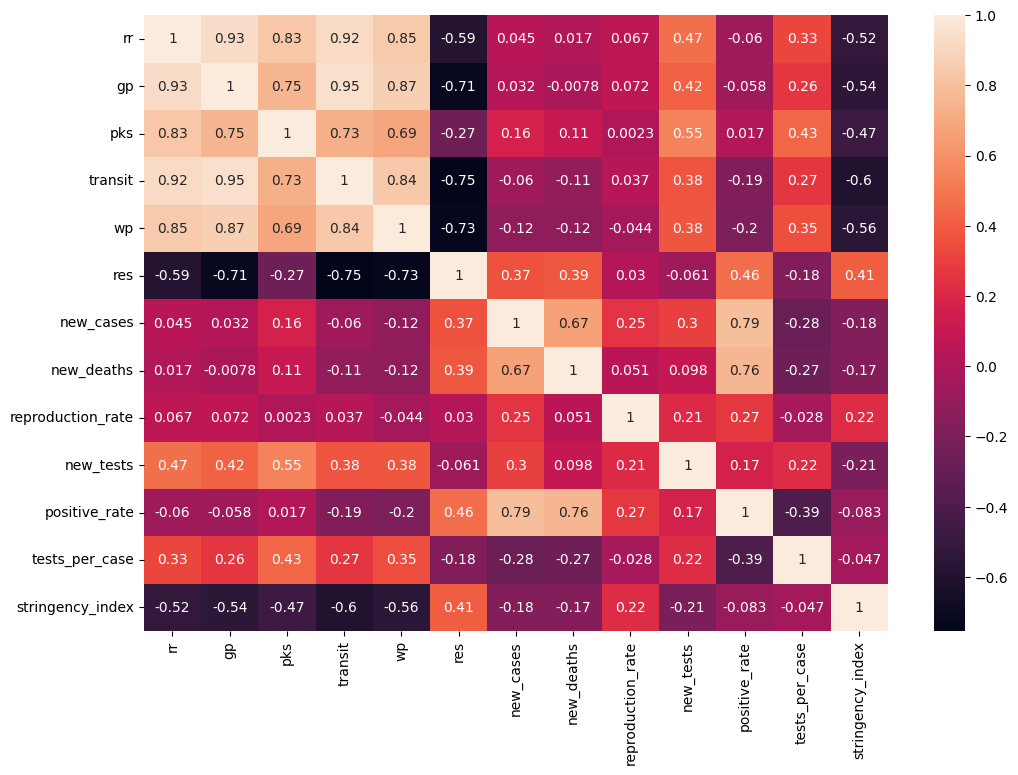

In [26]:
cor = final_covid_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True)
plt.show()

<h1><a name="correlation_results">Observations on Correlation Analysis</a></h1>

We observed a positive relationship between certain mobility data and Covid-19 data, particularly in residential mobility. An increase in Covid-19 cases led to an increase in residential mobility, as people spent more time at home during the pandemic. Conversely, locations such as transit stations and workplaces showed a weak negative relationship; an increase in Covid-19 cases resulted in decreased activity in these areas due to lockdowns and restrictions.

<h1><a name="summary">Summary</a></h1>

The preprocessing phase of the dataset involved removing columns irrelevant to evaluating the relationship between Covid-19 and mobility data, specifically focusing on impact, trend, and correlation. Columns with more than 80% missing values and those containing duplicate or redundant information were dropped. Missing values were addressed in the final preprocessing stage, with most being replaced by zero to ensure the continuity and completeness of the dataset for accurate analysis. The dataset was rescaled to ensure more meaningful visualizations by minimizing large differences between data points.

The analysis revealed that due to government measures such as lockdowns and curfews, residential areas saw the highest activity during the pandemic. In contrast, transit stations, workplaces, and parks experienced the least movement, with activity only increasing as restrictions eased and Covid-19 cases declined in early 2022. Grocery stores and pharmacies, considered essential, faced fewer restrictions and consequently saw the most traffic.

In terms of correlation, residential areas showed a positive correlation with Covid-19 cases, while other locations exhibited a negative correlation for the reasons mentioned above.

Potential use cases of this analysis include tracking the effectiveness of government measures in influencing community mobility and monitoring the spread of contagious diseases based on movement patterns. The effectiveness could be further enhanced by increasing the frequency of data collection to an hourly basis.

<h1><a name="references">References</a></h1>

references
https://www.google.com/covid19/mobility/

https://ourworldindata.org/coronavirus/country/rwanda
